In [1]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import parse_records as pr
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

labels = mnist.test.labels[:100]

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [3]:
weights = np.load("epoch_weights.npy")
weights.shape

(7, 100, 2)

# Try to align first two epochs

In [4]:
#Target matrix = what you're trying to match
#Source matrix = original matrix you're trying to rotate
source_matrix = (weights[1])
target_matrix = (weights[0])

In [5]:
print(source_matrix.shape, target_matrix.shape)

(100, 2) (100, 2)


In [6]:
def make_transform(source_matrix, target_matrix):
    product = np.matmul(source_matrix.transpose(), target_matrix)
    U, s, V = np.linalg.svd(product)
    trans = np.matmul(U, V)
    return trans

In [7]:
def make_apply_transform(source_matrix, target_matrix):
    product = np.matmul(source_matrix.transpose(), target_matrix)
    U, s, V = np.linalg.svd(product)
    trans = np.matmul(U, V)
    #target_matrix_new = np.matmul(target_matrix, trans)
    source_new = np.matmul(source_matrix, trans)
    return source_new

In [8]:
def apply_transform(source_matrix, trans): 
    target_matrix_new = np.matmul(source_matrix, trans)
    return target_matrix_new

In [9]:
def plot_with_labels(matrix, labels, filename=""):
    x = matrix[:, 0].tolist()
    y = matrix[:, 1].tolist()
    labels = mnist.test.labels[:100]
    plt.figure(figsize=(5, 5))  #in inches
    for i, label in enumerate(labels):
            plt.scatter(x, y)
            plt.annotate(label,
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
            if(len(filename) > 0): plt.savefig(filename)

In [10]:
trans = make_transform(source_matrix, target_matrix)
source_matrix_new = apply_transform(source_matrix,trans)

In [11]:
source_matrix_new[:5]

array([[-3.2185094,  5.011431 ],
       [-7.31421  ,  3.4305122],
       [-1.5117372, -2.820406 ],
       [ 4.149684 , -4.087768 ],
       [ 4.7030997,  2.9604661]], dtype=float32)

In [12]:
def avg_cos_sim(source, target):
    sims = np.array([sc.spatial.distance.cosine(source[i], target[i]) for i in range(len(source))])
   #print(sims)
    return np.average(sims)

Checking out the similarity between different vector representations. 
1. Source_matrix vs. \_new: should be close together, since they're the same matrix only rotated a bit. 
2. Source_matrix vs. target_matrix: should be relatively spread apart since we're trying to get source closer to target. 
3. Source_matrix_new vs. target_matrix: Should be a lower value than 2, since that would mean we've successfully aligned the two vector spaces, but likely won't be as low as 1. 

In [13]:
print("similarity of source to source_new", avg_cos_sim(source_matrix, source_matrix_new))
print("similarity of vectors before re-align",avg_cos_sim(source_matrix, target_matrix))
print("similarity of vectors after re-align",avg_cos_sim(source_matrix_new, target_matrix))

similarity of source to source_new 0.3736748230457306
similarity of vectors before re-align 0.6405016563343815
similarity of vectors after re-align 0.5555049610882997


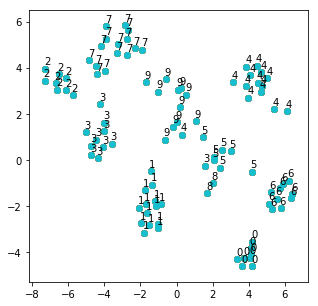

In [14]:
#plot_with_labels(target_matrix,labels)
#plot_with_labels(source_matrix, labels)
plot_with_labels(source_matrix_new, labels)

## Align Later Epochs with the First

In [15]:
source_matrix = weights[2]

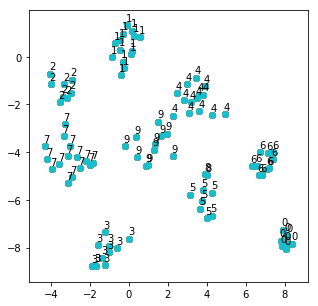

In [16]:
source_matrix2 = apply_transform(weights[2], trans)
plot_with_labels(source_matrix2, labels, "")

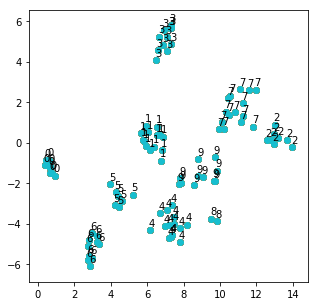

In [17]:
transform_epoch3 = apply_transform(weights[3], trans)
plot_with_labels(transform_epoch3, labels, "")